In [32]:
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt
from statistics import mean, stdev
from rlhfutils.dataproc import getfrac
from rlhfutils.data import webgpt_template

In [20]:
origdata = Dataset.load_from_disk("../../data/bagofwords/bowsynth250k//")

In [12]:
sftouts = pd.read_json("../../outputs/bagofwords/genouts/dpoplusbow50rm200.results")

In [27]:
# get a truncated version of origdata
truncdata = origdata.filter(lambda ex: (ex['score_j']<3) and (ex['magnitude']>0))
# truncdata.save_to_disk("../../data/bagofwords/bowmax2")

In [33]:
# make an SFT dataset out of dispreferred data to get our "smallsft". TODO this might not work? Can always try "reversed" version of dataset with dpo too
def disprefsft(ex):
    ex['outputs'] = webgpt_template(ex['question'], ex['response_k'])
    return ex
truncsft = truncdata.map(disprefsft, num_proc=10)
# truncsft.save_to_disk("../../data/bagofwords/truncsftdata")

(array([  5.,   0.,   0.,   0.,   0.,  15.,  54., 354.,  63.,   9.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

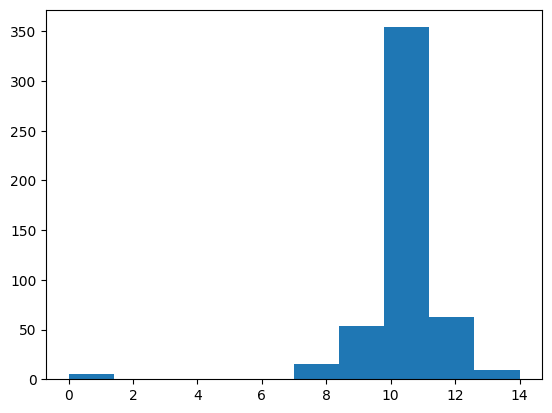

In [17]:
plt.hist([min(m) for m in sftouts['truncval']])

(array([3.7663e+04, 3.0200e+04, 1.6681e+04, 8.6630e+03, 4.3190e+03,
        1.7300e+03, 5.6000e+02, 1.4900e+02, 3.4000e+01, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

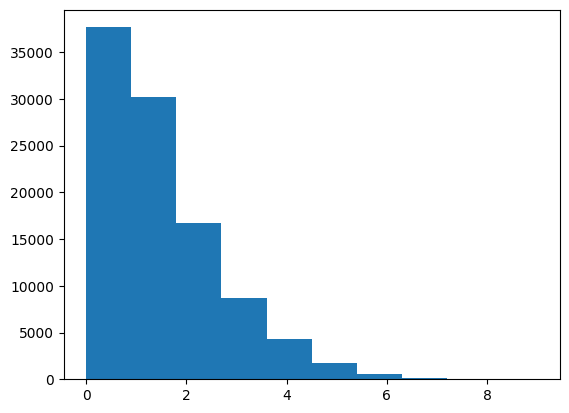

In [8]:
plt.hist(origdata['magnitude'])